In [1]:
%reload_kedro

2023-05-08 14:18:13,194 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/gpalazzo/Desktop/dev/crypto_msc_thesis
2023-05-08 14:18:13,789 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-05-08 14:18:14,611 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-05-08 14:18:14,612 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import quantstats as qs
import seaborn as sns

## XGBoost

### Operations Profit over Time

In [4]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

2023-05-08 14:18:15,923 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [5]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

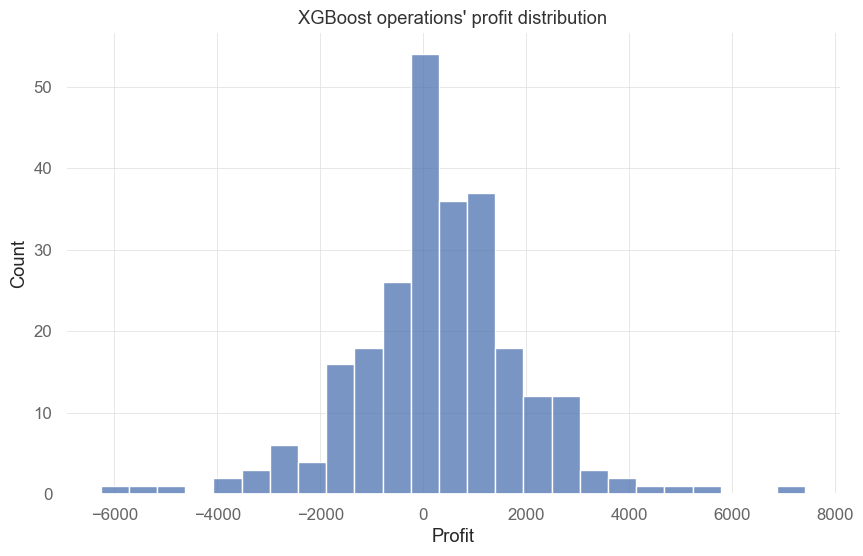

In [6]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="XGBoost operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_xgboost_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

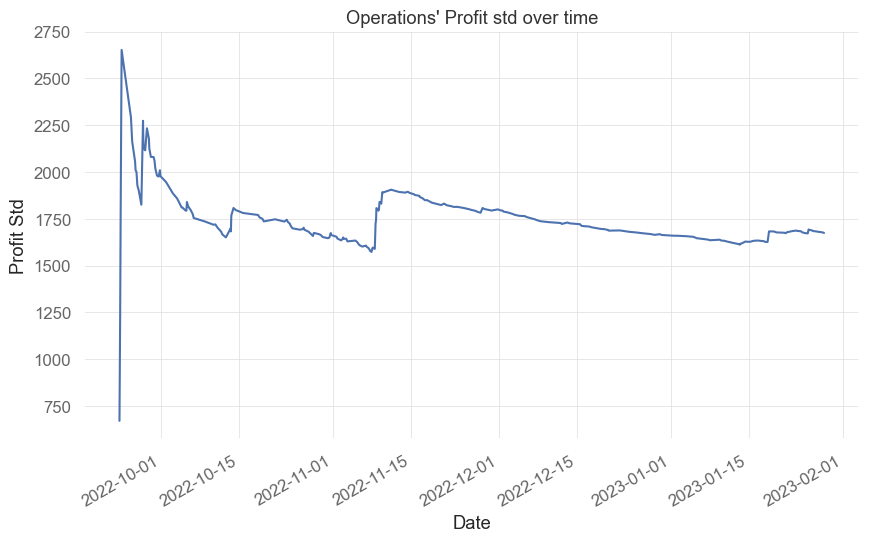

In [7]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

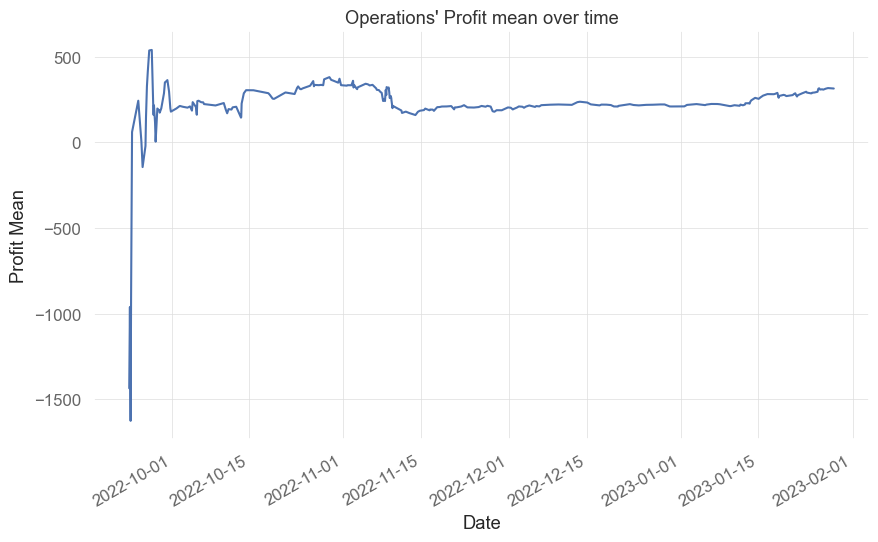

In [8]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LSTM

### Operations Profit over Time

In [9]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

2023-05-08 14:18:17,601 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [10]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

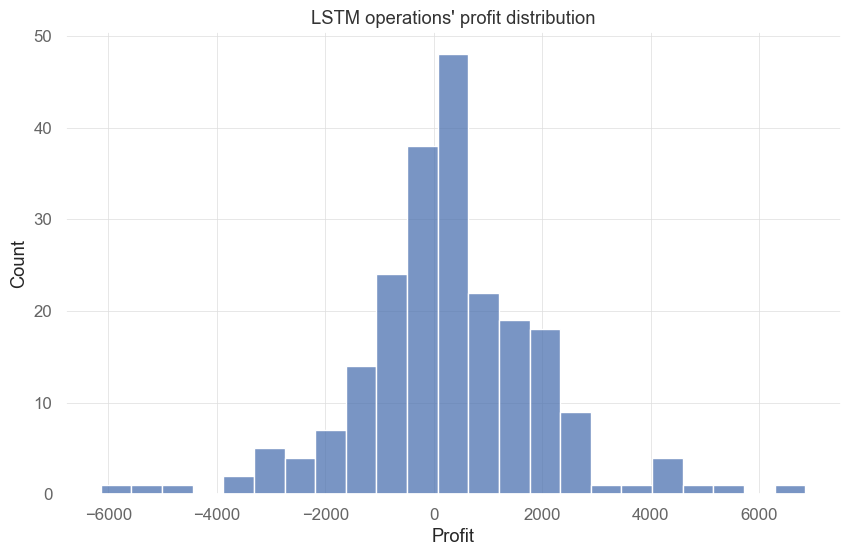

In [11]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LSTM operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_lstm_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

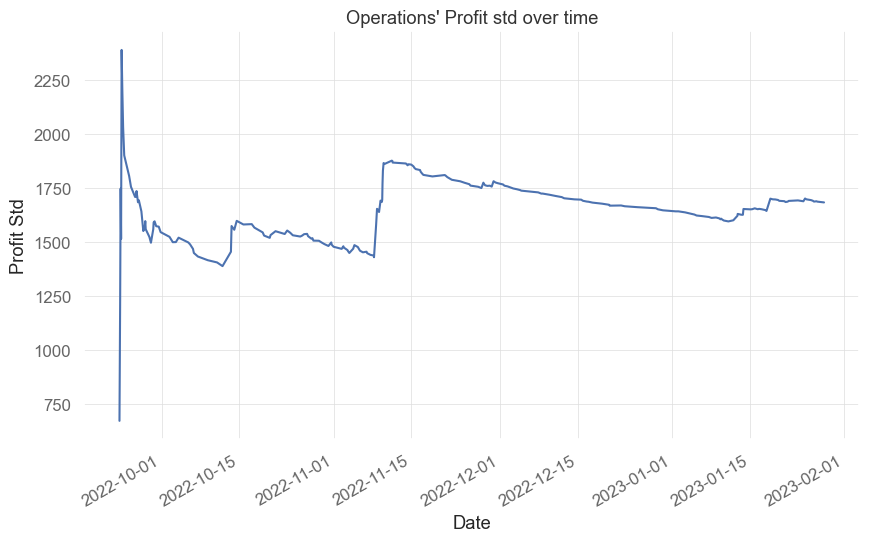

In [12]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

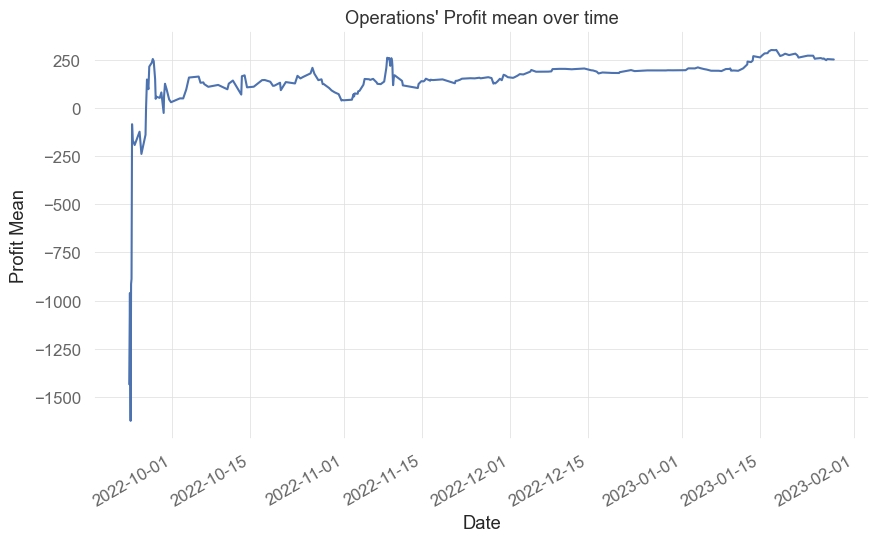

In [13]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## LogReg

### Operations Profit over Time

In [14]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

2023-05-08 14:18:19,196 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [15]:
df_ops = df_portf_pnl[["close_time", "op_full_profit"]] \
                .sort_values(by="close_time", ascending=True) \
                .reset_index(drop=True)

accum_mean = []
accum_std = []

for i in range(len(df_ops.index)):
    _accum_mean = df_ops.iloc[0:i+1].op_full_profit.mean()
    _accum_std = df_ops.iloc[0:i+1].op_full_profit.std(ddof=1)
    
    accum_mean.append(_accum_mean)
    accum_std.append(_accum_std)
    
# accum_std[0] = 0.0 #first data point has std as NaN, so substitute by 0

df_ops.loc[:, "mean"] = accum_mean
df_ops.loc[:, "std"] = accum_std

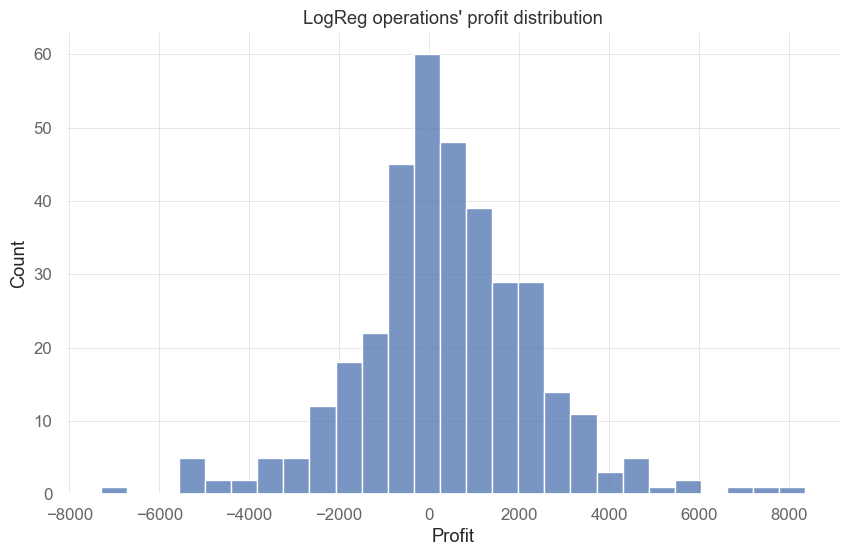

In [16]:
df = df_ops[["close_time", "op_full_profit"]] \
            .rename(columns={"close_time": "Date",
                            "op_full_profit": "Profit"}) \
            .set_index("Date") \
            .sort_index()

plot = sns.histplot(data=df,
             legend=None,
             x="Profit",
            ) \
            .set(title="LogReg operations' profit distribution")

plt.savefig("/Users/gpalazzo/Desktop/fig_logreg_ops_profit.png")

<Axes: title={'center': "Operations' Profit std over time"}, xlabel='Date', ylabel='Profit Std'>

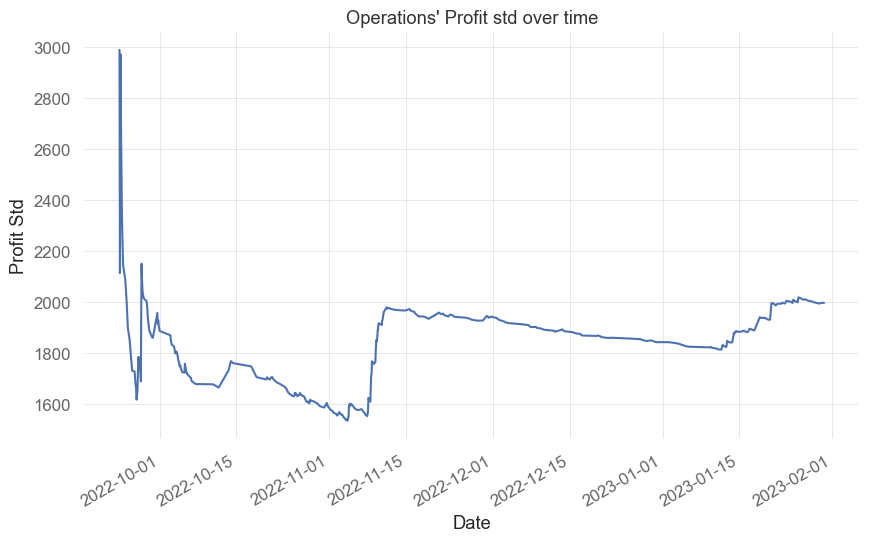

In [17]:
df_ops[["close_time", "std"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit std over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Std"
                    )

<Axes: title={'center': "Operations' Profit mean over time"}, xlabel='Date', ylabel='Profit Mean'>

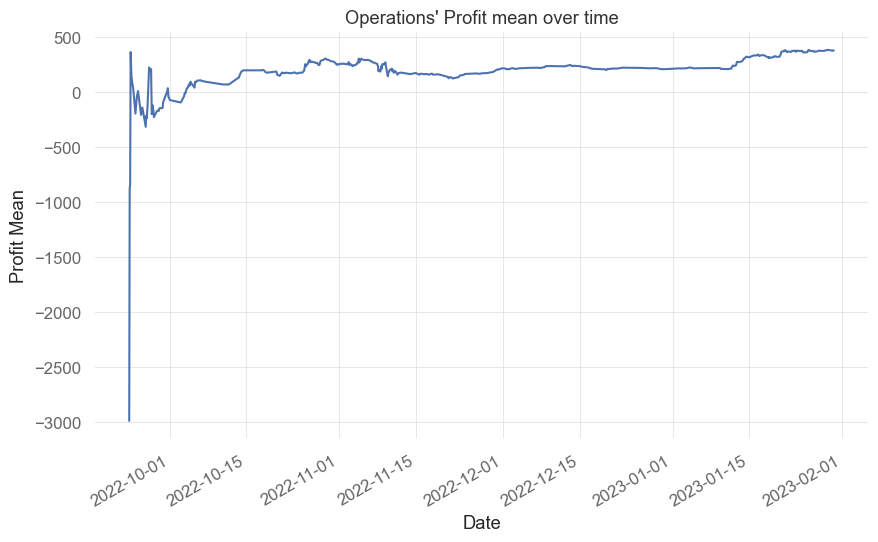

In [18]:
df_ops[["close_time", "mean"]].set_index("close_time").sort_index(). \
                plot(title="Operations' Profit mean over time", 
                     legend=None,
                     xlabel="Date",
                     ylabel="Profit Mean"
                    )

## Benchmark

In [19]:
df_portf_pnl_benchmark = catalog.load("benchmark_trendfollowing_pnl")

df_portf_pnl_benchmark.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl_benchmark["pctchg_pos"])

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_portf_pnl_benchmark.loc[:, "logret_accum"] = df_portf_pnl_benchmark["logret_pos"].cumsum()
df_portf_pnl_benchmark.loc[:, "pctchg_accum"] = np.exp(df_portf_pnl_benchmark["logret_accum"]) - 1

df_portf_pnl_benchmark = df_portf_pnl_benchmark[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos_benchmark",
                                   "pctchg_accum": "portf_pctchg_accum_benchmark"})

df_portf_pnl_benchmark.index = pd.to_datetime(df_portf_pnl_benchmark.index)

2023-05-08 14:18:20,642 - kedro.io.data_catalog - INFO - Loading data from `benchmark_trendfollowing_pnl` (ParquetDataSet)...


## XGBoost

### Portfolio overall metrics - Part 1

In [20]:
df_portf_metr = catalog.load("xgboost_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "xgboost"
df_portf_metr

2023-05-08 14:18:20,664 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,80317.613176,6,5,xgboost


### Portfolio overall metrics - Part 2

In [21]:
df_portf_pnl = catalog.load("xgboost_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

xgboost = df_logret.copy()

2023-05-08 14:18:20,683 - kedro.io.data_catalog - INFO - Loading data from `xgboost_portfolio_pnl` (ParquetDataSet)...


In [22]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-28
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   53.55%
CAGR﹪              242.96%

Sharpe              3.46
Prob. Sharpe Ratio  99.81%
Sortino             5.55
Sortino/√2          3.93
Omega               1.66

Max Drawdown        -8.81%
Longest DD Days     27

Gain/Pain Ratio     1.48
Gain/Pain (1M)      -

Payoff Ratio        1.03
Profit Factor       1.66
Common Sense Ratio  1.86
CPC Index           1.06
Tail Ratio          1.12
Outlier Win Ratio   3.95
Outlier Loss Ratio  3.67

MTD                 20.35%
3M                  29.18%
6M                  53.55%
YTD                 20.35%
1Y                  53.55%
3Y (ann.)           242.96%
5Y (ann.)           242.96%
10Y (ann.)          242.96%
All-time (ann.)     242.96%

Avg. Drawdown       -1.43%
Avg. Drawdown Days  2
Recovery Factor     6.07
Ulcer Index         0.02
Serenity Index      

## LSTM

### Portfolio overall metrics - Part 1

In [24]:
df_portf_metr = catalog.load("lstm_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "lstm"
df_portf_metr

2023-05-08 14:18:21,821 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,56085.759374,8,5,lstm


### Portfolio overall metrics - Part 2

In [25]:
df_portf_pnl = catalog.load("lstm_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

lstm = df_logret.copy()

2023-05-08 14:18:21,835 - kedro.io.data_catalog - INFO - Loading data from `lstm_portfolio_pnl` (ParquetDataSet)...


In [26]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-28
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   37.39%
CAGR﹪              149.17%

Sharpe              2.84
Prob. Sharpe Ratio  98.74%
Sortino             4.55
Sortino/√2          3.21
Omega               1.52

Max Drawdown        -8.16%
Longest DD Days     24

Gain/Pain Ratio     0.89
Gain/Pain (1M)      -

Payoff Ratio        1.08
Profit Factor       1.52
Common Sense Ratio  1.61
CPC Index           0.96
Tail Ratio          1.06
Outlier Win Ratio   3.83
Outlier Loss Ratio  4.03

MTD                 12.14%
3M                  30.13%
6M                  37.39%
YTD                 12.14%
1Y                  37.39%
3Y (ann.)           149.17%
5Y (ann.)           149.17%
10Y (ann.)          149.17%
All-time (ann.)     149.17%

Avg. Drawdown       -1.8%
Avg. Drawdown Days  4
Recovery Factor     4.58
Ulcer Index         0.03
Serenity Index      2

## LogReg

### Portfolio overall metrics - Part 1

In [28]:
df_portf_metr = catalog.load("logreg_portfolio_metrics")
df_portf_metr.loc[:, "model"] = "LogReg"
df_portf_metr

2023-05-08 14:18:22,859 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_metrics` (ParquetDataSet)...


,nominal_profit,consecutive_wins,consecutive_losses,model
0,135315.411054,9,6,LogReg


### Portfolio overall metrics - Part 2

In [29]:
df_portf_pnl = catalog.load("logreg_portfolio_pnl")

df_portf_pnl.loc[:, "logret_pos"] = np.log(1 + df_portf_pnl["pctchg_pos"])

df_logret = df_portf_pnl[["close_time", "pctchg_pos", "logret_pos"]] \
                        .rename(columns={"close_time": "date"}) \
                        .set_index("date").sort_index()

df_logret.loc[:, "logret_accum"] = df_logret["logret_pos"].cumsum()
df_logret.loc[:, "pctchg_accum"] = np.exp(df_logret["logret_accum"]) - 1

df_logret = df_logret[["pctchg_pos", "pctchg_accum"]] \
                    .rename(columns={"pctchg_pos": "portf_pctchg_pos",
                                   "pctchg_accum": "portf_pctchg_accum"})

df_logret.index = pd.to_datetime(df_logret.index)

logreg = df_logret.copy()

2023-05-08 14:18:22,874 - kedro.io.data_catalog - INFO - Loading data from `logreg_portfolio_pnl` (ParquetDataSet)...


In [30]:
qs.reports.metrics(returns=df_logret["portf_pctchg_pos"], periods_per_year=360)

                    Strategy
------------------  ----------
Start Period        2022-09-23
End Period          2023-01-30
Risk-Free Rate      0.0%
Time in Market      100.0%

Cumulative Return   90.21%
CAGR﹪              525.54%

Sharpe              3.37
Prob. Sharpe Ratio  99.96%
Sortino             5.39
Sortino/√2          3.81
Omega               1.63

Max Drawdown        -10.45%
Longest DD Days     21

Gain/Pain Ratio     2.01
Gain/Pain (1M)      35.05

Payoff Ratio        1.12
Profit Factor       1.63
Common Sense Ratio  1.91
CPC Index           1.08
Tail Ratio          1.17
Outlier Win Ratio   3.62
Outlier Loss Ratio  3.92

MTD                 39.41%
3M                  57.7%
6M                  90.21%
YTD                 39.41%
1Y                  90.21%
3Y (ann.)           525.54%
5Y (ann.)           525.54%
10Y (ann.)          525.54%
All-time (ann.)     525.54%

Avg. Drawdown       -1.87%
Avg. Drawdown Days  3
Recovery Factor     8.64
Ulcer Index         0.03
Serenity Index  

## Cumulative Returns

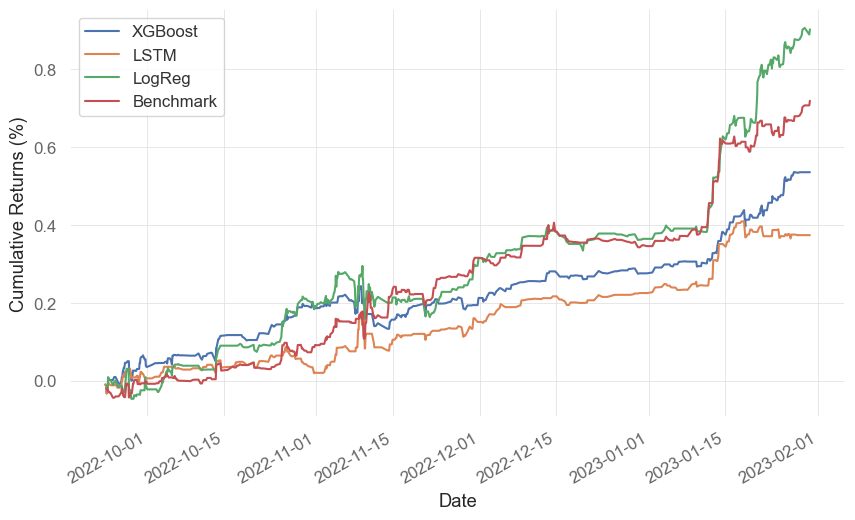

In [34]:
df = xgboost[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "XGBoost"}) \
        .merge(lstm[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LSTM"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(logreg[["portf_pctchg_accum"]].rename(columns={"portf_pctchg_accum": "LogReg"}), 
               left_index=True, 
               right_index=True, 
               how="outer") \
        .merge(df_portf_pnl_benchmark[["portf_pctchg_accum_benchmark"]] \
                       .rename(columns={"portf_pctchg_accum_benchmark": "Benchmark"}), 
               left_index=True, 
               right_index=True, 
               how="outer")

plot = df.ffill().plot()

plt.xlabel("Date")
plt.ylabel("Cumulative Returns (%)")

fig = plot.get_figure()
fig.savefig("/Users/gpalazzo/Desktop/fig_portfolios_vs_benchmk_rets.png")